### DOTA 데이터셋 분석

annotation 파일별 label 된 개수가 너무 많아서 가끔 CUDA OOM 이 발생하곤 했다.

그래서 도대체 DOTA 데이터셋에 labeling 된 건 몇 개가 있으며

어떤 분포로? 이뤄져 있는지 확인해보고자 작성한다.

In [1]:
import os
from glob import glob

In [2]:
def get_dota_analyzed_info(path, path_splitter='/'):
    annotation_path = path

    file_list = glob(annotation_path)

    filename_list = []
    anno_count_list = []

    min_count = 99999999999
    max_count = 0
    total_count = 0

    for i, file in enumerate(file_list):
        #if i > 100:
        #    break
        filename = file.split(path_splitter)[-1]
        with open(file) as f:
            annotations = f.readlines()
            anno_count = len(annotations) - 2       # 2 means meta row count
        
        filename_list.append(filename)
        anno_count_list.append(anno_count)
        total_count += anno_count
        
        if anno_count < min_count:
            min_count = anno_count
        if anno_count > max_count:
            max_count = anno_count    
        
    return [filename_list, anno_count_list, min_count, max_count, total_count]

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def draw_graph(target, analyzed_info):
    height = analyzed_info[1]
    bars = tuple(analyzed_info[0])
    x_pos = np.arange(len(bars))
    
    min_count = analyzed_info[2]
    max_count = analyzed_info[3]
    total_count = analyzed_info[4]

    # figure size
    fig = plt.figure(figsize=(12,8))

    # Create bars and choose color
    plt.bar(bars, height, color=(0.5, 0.1, 0.5, 0.6))

    # Add title and axis names
    plt.title(target + ' - label count per file')
    plt.xlabel('filename')
    plt.ylabel('count')

    # Create names on the x axis
    plt.xticks(x_pos, bars, rotation=45)

    # Show graph
    plt.show()

In [4]:
# DOTA-v1.0 train
path = '../dl_data/DOTA-v1.0-v1.5/train/labelTxt-v1.0/*.txt'

train_info = get_dota_analyzed_info(path)
train_info[2:]

[0, 1939, 98990]

In [15]:
# DOTA-v1.0 val
path = '../dl_data/DOTA-v1.0-v1.5/val/labelTxt-v1.0/*.txt'

val_info = get_dota_analyzed_info(path)
val_info[2:]

[0, 1401, 28853]

In [5]:
# DOTA-v1.5 train
path = '../dl_data/DOTA-v1.0-v1.5/train/DOTA-v1.5_train/*.txt'

train_info_15 = get_dota_analyzed_info(path)
train_info_15[2:]

[0, 10206, 210631]

In [17]:
# DOTA-v1.5 val
path = '../dl_data/DOTA-v1.0-v1.5/val/DOTA-v1.5_val/*.txt'

train_info_15 = get_dota_analyzed_info(path)
train_info_15[2:]

[1, 8609, 69565]

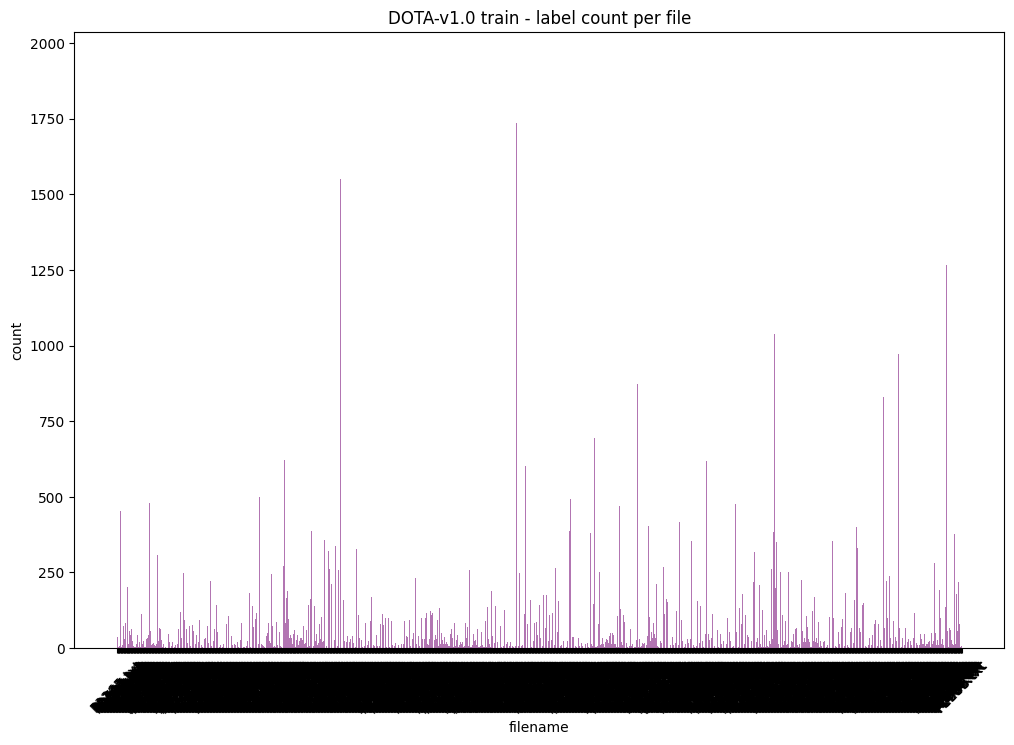

In [9]:
draw_graph('DOTA-v1.0 train', train_info)

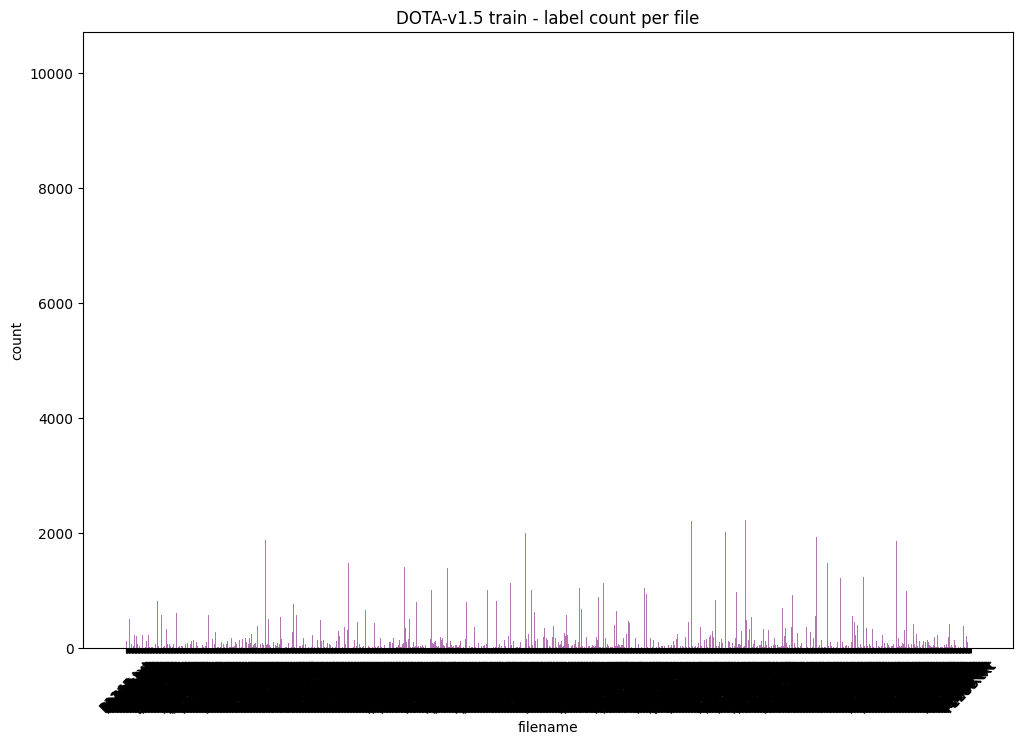

In [10]:
draw_graph('DOTA-v1.5 train', train_info_15)

히스토그램도 그려보면

(array([1.298e+03, 6.900e+01, 2.200e+01, 8.000e+00, 8.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([   0. ,  193.9,  387.8,  581.7,  775.6,  969.5, 1163.4, 1357.3,
        1551.2, 1745.1, 1939. ]),
 <BarContainer object of 10 artists>)

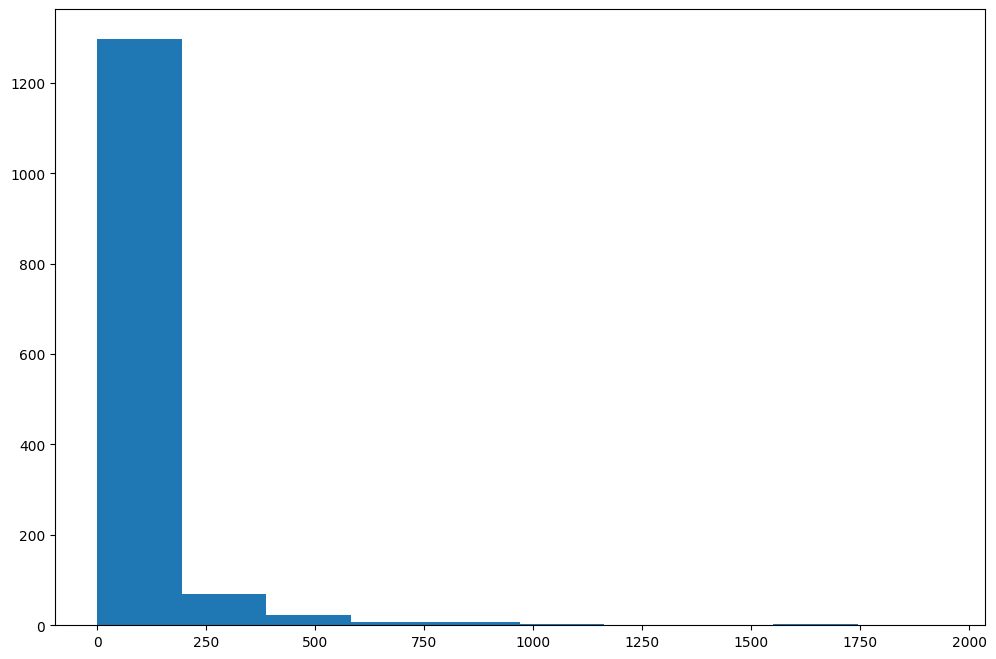

In [13]:
plt.figure(figsize=(12,8))
plt.hist(train_info[1])

(array([1.375e+03, 3.000e+01, 4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  1020.6,  2041.2,  3061.8,  4082.4,  5103. ,  6123.6,
         7144.2,  8164.8,  9185.4, 10206. ]),
 <BarContainer object of 10 artists>)

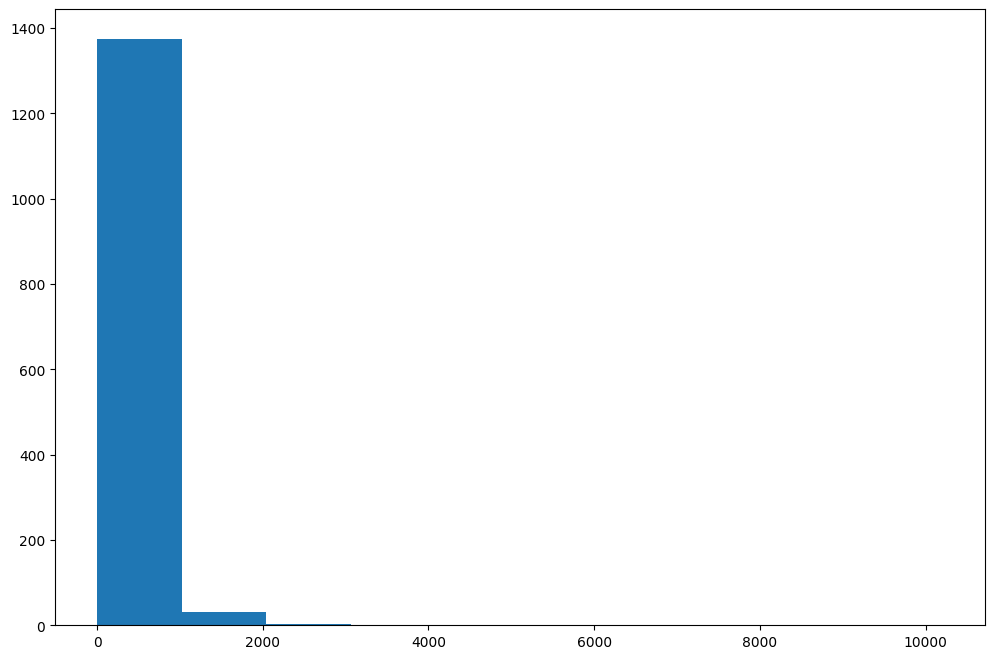

In [14]:
plt.figure(figsize=(12,8))
plt.hist(train_info_15[1])